# MU4MEF04 –Méthodes Numériques pour les écoulements incompressibles- S1
## TP5 Méthodes itératives
### Master SPI – MSH
#### ZHOU Zixin 28609845

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
import os, sys
import math
import time

### 1. On considère sur [0,1]
$$
\frac{d^{2} u}{d x^{2}}=\sin (12 \pi x) 
$$
$$
\operatorname{avec} u(0)=u(1)=0
$$

### 2. Quelle est la solution analytique?

La solution analytique est 
$$
u = -\frac{1}{144 \pi ^ 2} sin(12 \pi x ) 
$$

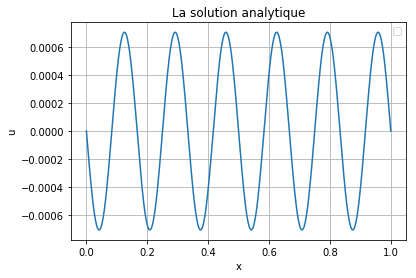

In [2]:
# La solution analytique
def u_exact(N):
    x = np.linspace(0, 1, N)
    u = - (1. / (144 * math.pi ** 2) ) * np.sin(12 * math.pi * x)
    return u

N     = 512
x     = np.linspace(0, 1, N)

plt.figure()
plt.xlabel("x")
plt.ylabel("u")
plt.title(u"La solution analytique")    
plt.plot(x,u_exact(N))
plt.grid()
plt.legend() 
plt.show()

### 3. Ecrire la discrétisation de l'équation par différences finies centrées


$$u^{n}_{i}=\frac{u^{n-1}_{i-1}+u^{n-1}_{i+1}-\Delta x^{2} f_{i}}{2}$$

### 4. Appliquer une méthode itérative de type Jacobi retardé avec $\omega=2 / 3$ pour $\mathrm{N}=512$ points. Considérer la condition initiale $u(x)=\operatorname{asin}(20 \pi x)+$ $b \sin (6 \pi x)+\operatorname{csin}(\pi x) .$ Prendre d'abord $a=b=c=1 .$ Vous pouvez ensuite considérer d'autres valeurs de a, b et c. 

### Représenter l'erreur en fonction de l'itération. Comment décroit l'erreur? Quelles sont les fréquences amorties les plus vite?

Jacobi retardé:
$$u^{n}_{i}=\frac{\omega\left(u^{n-1}_{i-1}+u^{n-1}_{i+1}-\Delta x^{2} f_{i}\right)}{2}+(1-\omega) u^{n-1}_{i}$$

In [3]:
def fonc(N):
    x = np.linspace(0, 1, N)
    f = np.sin(12*math.pi*x)
    return f

def u_initiale(a,b,c,N):
    x   = np.linspace(0, 1, N)
    u_0 = a * np.sin(20 * math.pi * x) + b * np.sin(6 * math.pi * x) + c * np.sin(math.pi * x)
    return u_0

def Jacobi(u_0, f, N, delta, kmax):
    utmp  = u_0
    u     = np.zeros(N)    
    omega = 2./3
    for k in range(kmax):
        for i in range(1,N-1): 
            u[i] = omega * ( - f[i] * delta ** 2 + utmp[i + 1] + utmp[i-1]) / 2 + (1 - omega) * utmp[i]
        utmp = u.copy()
    return u

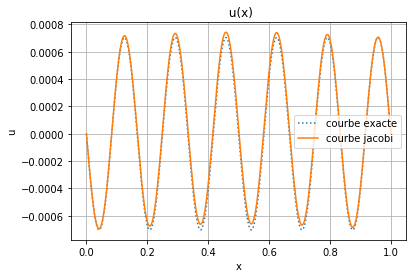

In [4]:
N        = 512
x        = np.linspace(0, 1, N)
u_Jacobi = Jacobi(u_initiale(1,1,1,N), fonc(N), N, 1./N, 800000)

plt.figure()
plt.xlabel("x")
plt.ylabel("u")
plt.plot(x,u_exact(N),':',label="courbe exacte")
plt.plot(x,u_Jacobi,label="courbe jacobi")
plt.title(u" u(x)")   
plt.grid()
plt.legend() 
plt.show()

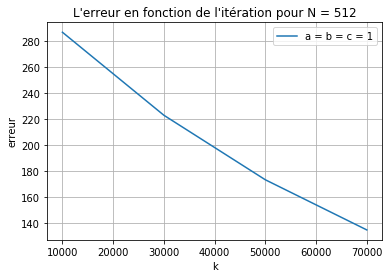

In [5]:
# a = b = c = 1

k = [10000, 30000, 50000, 70000]

error_abc_1 = []
    
for i in k:
    u_Jacobi = Jacobi(u_initiale(1,1,1,N), fonc(N), N, 1./N, i)
    error_abc_1.append(np.sum(np.abs(u_Jacobi - u_exact(N))))    

plt.figure()
plt.xlabel("k")
plt.ylabel("erreur")
plt.title(u"L'erreur en fonction de l'itération pour N = 512")    
plt.plot(k,error_abc_1,label="a = b = c = 1")
plt.grid()
plt.legend() 
plt.show()
    

On peut trouver que l'erreur déçoit quand le nombre d'itérations augment.

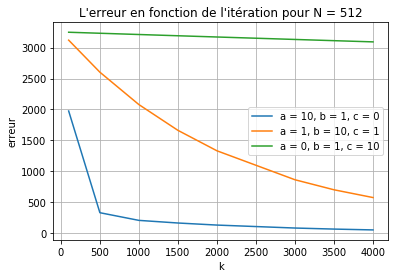

In [6]:
N = 512
x = np.linspace(0, 1, N)
k = [100, 500, 1000, 1500, 2000, 3000, 3500, 4000]

error_a_1   = []
error_b_1   = []
error_c_1   = []
    
for i in k:
    # a = 10, b = 1, c = 0
    u_Jacobi  = Jacobi(u_initiale(10,1,0,N), fonc(N), N, 1./N, i)
    error_a_1.append(np.sum(np.abs(u_Jacobi - u_exact(N))))
    
    # a = 1, b = 10, c = 1
    u_Jacobi  = Jacobi(u_initiale(1,10,1,N), fonc(N), N, 1./N, i)
    error_b_1.append(np.sum(np.abs(u_Jacobi - u_exact(N))))
    
    # a = 0, b = 1, c = 10
    u_Jacobi  = Jacobi(u_initiale(0,1,10,N), fonc(N), N, 1./N, i)
    error_c_1.append(np.sum(np.abs(u_Jacobi - u_exact(N))))

plt.figure()
plt.xlabel("k")
plt.ylabel("erreur")
plt.title(u"L'erreur en fonction de l'itération pour N = 512")
plt.plot(k,error_a_1,label="a = 10, b = 1, c = 0")
plt.plot(k,error_b_1,label="a = 1, b = 10, c = 1")
plt.plot(k,error_c_1,label="a = 0, b = 1, c = 10")
plt.grid()
plt.legend() 
plt.show()
    

Selon le graphe en haut, on peut voir que:
pour a = 10, b = 1, c = 1, autrement dit la partie haute fréquence a un effet principal. Dans ce cas, l'erreur décroît rapide.
pour a = 1, b = 1, c = 10, autrement dit la partie basse fréquence a un effet principal. Dans ce cas, l'erreur décroît lentement.
Donc on peut conclure que les hautes fréquences amortissent plus vite, mais les basses fréquences amortissent moins vite.


### 5. Refaire la question pour $\mathrm{N}=32$. Qu'observez-vous? Expliquez. Comment est l'erreur? Comment se passe l'amortissement des fréquences?

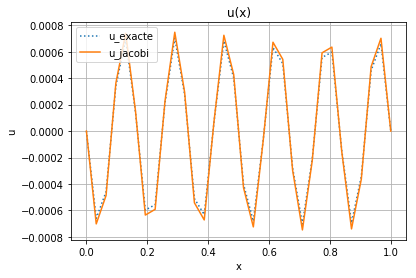

In [7]:
N        = 32
x        = np.linspace(0, 1, N)
u_Jacobi = Jacobi(u_initiale(1,1,1,N), fonc(N), N, 1./N, 100000)

plt.figure()
plt.xlabel("x")
plt.ylabel("u")
plt.plot(x,u_exact(N),':',label="u_exacte")
plt.plot(x,u_Jacobi,label="u_jacobi")
plt.title(u"u(x)")   
plt.grid()
plt.legend() 
plt.show()

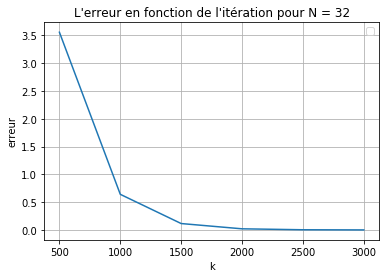

In [8]:

k = [500, 1000, 1500, 2000, 2500, 3000]

error_Jacobi = []
    
for i in k:
    u_Jacobi = Jacobi(u_initiale(1,1,1,N), fonc(N), N, 1./N, i)
    error_Jacobi.append(np.sum(np.abs(u_Jacobi - u_exact(N))))

plt.figure()
plt.xlabel("k")
plt.ylabel("erreur")
plt.title(u"L'erreur en fonction de l'itération pour N = 32")    
plt.plot(k,error_Jacobi)
plt.grid()
plt.legend() 
plt.show()    
    
     

Pour N = 32, l'erreur converge plus rapide que celui pour N = 512.

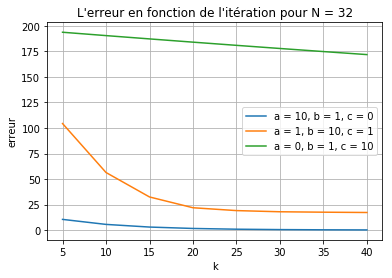

In [9]:
N = 32
x = np.linspace(0, 1, N)
k = [ 5, 10, 15, 20, 25, 30, 35, 40]

error_a_1   = []
error_b_1   = []
error_c_1   = []
    
for i in k:
    # a = 10, b = 1, c = 0
    u_Jacobi  = Jacobi(u_initiale(10,1,0,N), fonc(N), N, 1./N, i)
    error_a_1.append(np.sum(np.abs(u_Jacobi - u_exact(N))))
    
    # a = 1, b = 10, c = 1
    u_Jacobi  = Jacobi(u_initiale(1,10,1,N), fonc(N), N, 1./N, i)
    error_b_1.append(np.sum(np.abs(u_Jacobi - u_exact(N))))
    
    # a = 0, b = 1, c = 10
    u_Jacobi  = Jacobi(u_initiale(0,1,10,N), fonc(N), N, 1./N, i)
    error_c_1.append(np.sum(np.abs(u_Jacobi - u_exact(N))))

plt.figure()
plt.xlabel("k")
plt.ylabel("erreur")
plt.title(u"L'erreur en fonction de l'itération pour N = 32")
plt.plot(k,error_a_1,label="a = 10, b = 1, c = 0")
plt.plot(k,error_b_1,label="a = 1, b = 10, c = 1")
plt.plot(k,error_c_1,label="a = 0, b = 1, c = 10")
plt.grid()
plt.legend() 
plt.show()

En traitant le graphe en haut, on trouve la même conclusion qu'avant: les hautes fréquences amortissent plus vite, mais les basses fréquences amortissent moins vite.

### 6. (bonus) Essayer d'améliorer la convergence de la méthode c'est-à-dire de diminuer le nombre d'itérations et le temps de calcul en utilisant les deux grilles. Vous pouvez mesurer le temps écoulé avec les commandes matlab tic/toc ou avec la bibliothèque time de python:

Exemple:

import time


start $=$ time.time ()

...

end $=$ time.time () 

print(end - start)